In [1]:
##############################
# IMPORTS
##############################
import numpy as np
import matplotlib.pyplot as plt
from ClassicalMechanicsSolvers2 import *

In [2]:
##############################
# ACCELERATION FUNCTION
##############################
def twoD_HO_acceleration (params):
    w0, v, x, t = params
    return -w0**2*x

In [3]:
##############################
# ANALYTICAL SOLUTION
##############################
def twoD_HO_position (params):
    rmin,w0,v,x,t = params
    return np.array([rmin*np.cos(w0*t), rmin*np.sin(w0*t)])

In [4]:
##############################
# SET UP SOLVER CLASS
##############################
# DEFINE CONSTANTS
L = 1
k = 1
m = 1
rmin = (L**2/(m*k))**(1/4)
w0 = np.sqrt(k/m)
v0 = w0*rmin

# SET INITIAL CONDITIONS
v_0 = np.array([0,v0])
r_0 = np.array([rmin,0])

# SET UP TIME
DeltaT = 0.001
tfinal = 20

# SET UP PARAMETERS FOR ACCELERTION AND ANALYTICAL POSITION FUNCTIONS
params_a = [w0]
params_y = [rmin,w0]

# INITIATE THE SOLVER CLASS
cm = ClassicalMechanicsSolvers(params_a, params_y,DeltaT, tfinal, v_0, r_0, m, oneD = False)

In [5]:
##############################
# VELOCITY-VERLET
##############################
cm.velocity_verlet(-100, twoD_HO_acceleration, twoD_HO_position)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


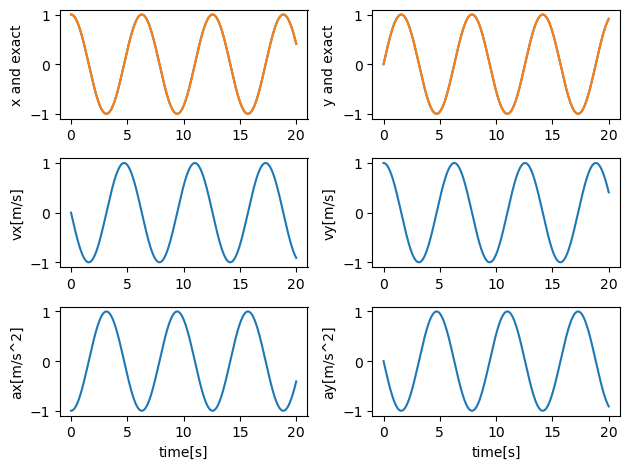

In [6]:
##############################
# PLOT THE RESULTS
##############################
cm.graph_data_2D()

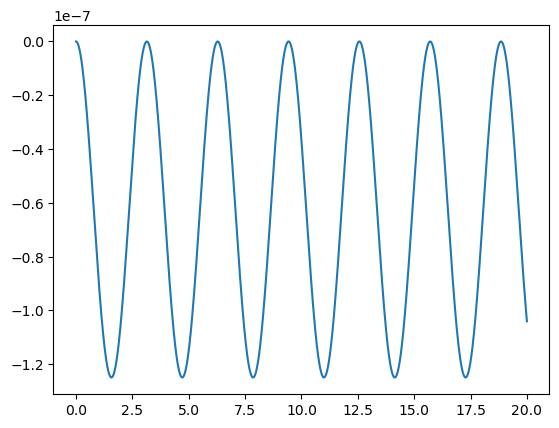

In [7]:
##############################
# IS RADIUS CONSTANT?
##############################
radius = np.sqrt(cm.y[:,0]**2 + cm.y[:,1]**2)
plt.plot(cm.t, rmin-radius)

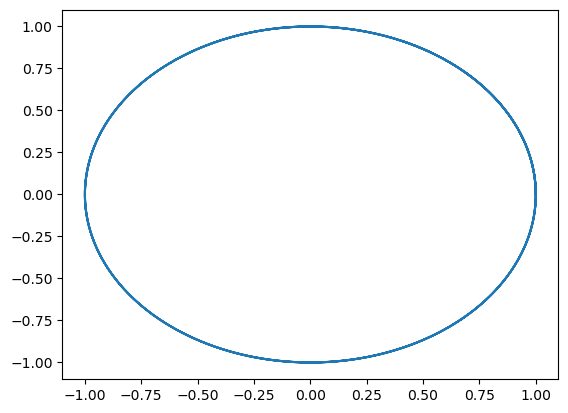

In [8]:
##############################
# CIRCULAR ORBIT?
##############################
plt.plot(cm.y[:,0], cm.y[:,1])